# Analisis de Resultados: Encuesta de Uso de Servicios de Streaming de Musica

## Plataformas de Musica por Grupo de Edad

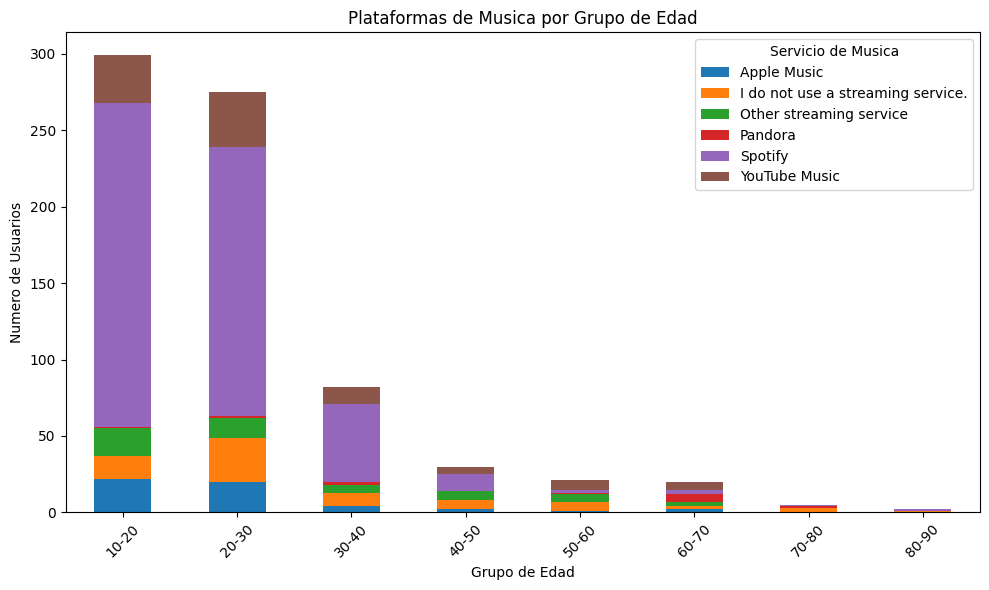

In [6]:
from imports import *

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
df['decada'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

platform_counts = df.groupby(['decada', 'Primary streaming service'], observed=True).size().unstack().fillna(0)

platform_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Plataformas de Musica por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Numero de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Servicio de Musica')
plt.tight_layout()

plt.show()

Con esta grafica dividimos por grupos de edad en decadas la tendencia de uso de cada servicio de musica.
Podemos sacar en conclusión que el servicio de musica en streaming más utilizaado es **Spotify**, sobretodo en los grupos de **10 a 30**.
A partir de los 30 sigue siendo mayor pero en mucha menor medida, y otras plataformas ganan relevancia como **Youtube Music** o **Pandora**, los cual tiene mayor presencia entre los 60 y 70.
Por ultimo, ya en el grupo de 70 en adelante predomina la elección de no utilizar servicios de streaming de musica.

## Tiempo de escucha de musica por grupo de edad

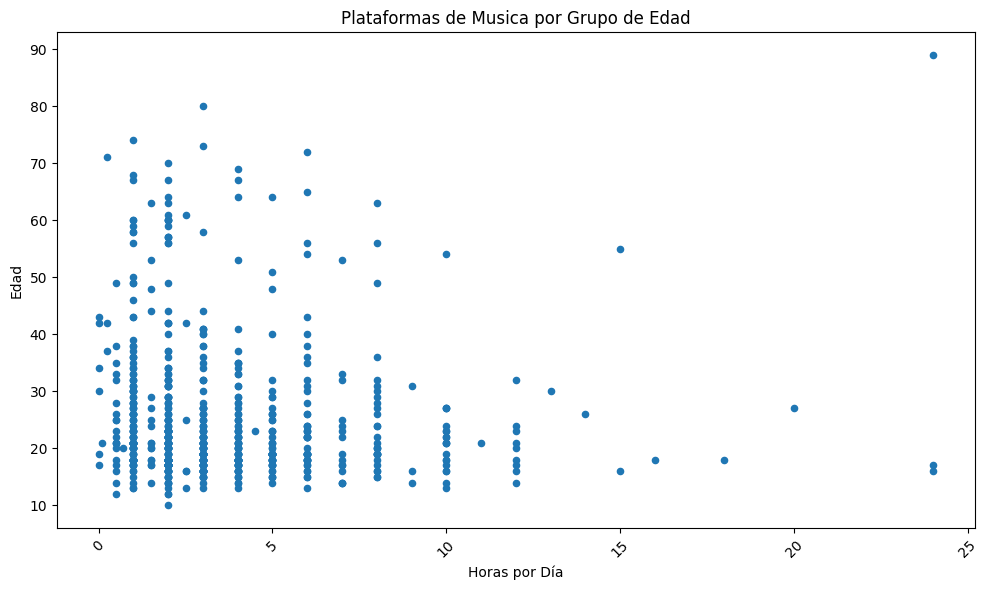

In [16]:
from imports import *

df.plot(kind='scatter', x='Hours per day', y='Age', figsize=(10, 6))

plt.title('Plataformas de Musica por Grupo de Edad')
plt.xlabel('Horas por Día')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Se puede observar que entre los 10 y los 30 los usuarios tienden a escuchar hasta aproximadamente **13 horas al dia** de musica. Esta tendencia decae a partir de los 30 donde se reduce hasta menos de **10 horas al dia**. A partir de los 40 se reduce significativamente a **5 horas** y ya un menor numero de usuarios, aunque, si bien las horas no aumentan, la cantidad de usuarios que vuelven a oir musica incrementa pasados los 50.

La **conclusión final** es que las personas menores de 30 tiene el mayor tiempo de escucha de musica de aproximadamente 13 horas, que va decayendo con el paso de los años hasta menos de 10 y posteriormente 5 horas.

## Géneros más escuchado

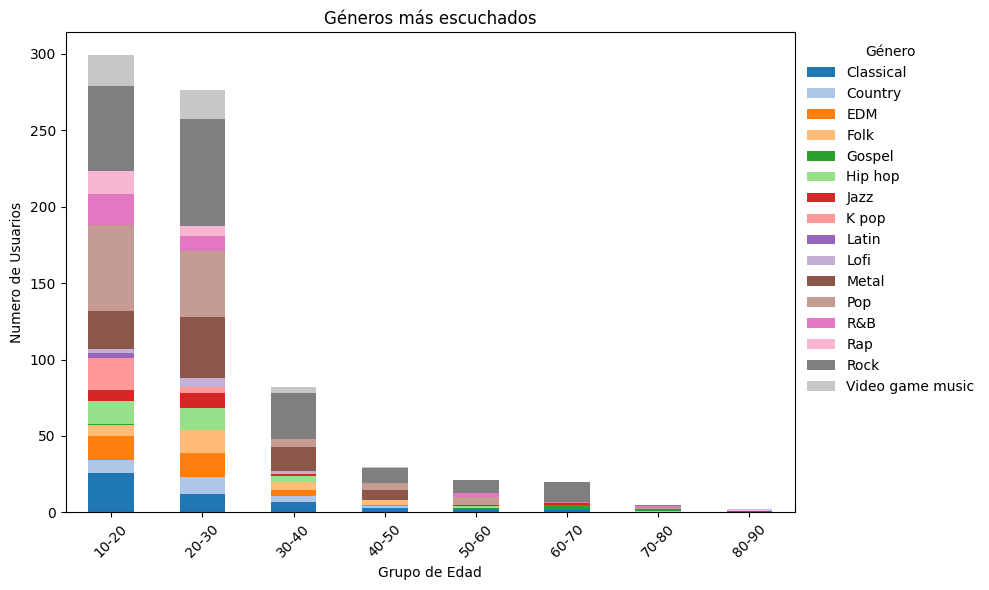

In [8]:
from imports import *

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
df['decada'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

colors = plt.cm.tab20.colors

platform_counts = df.groupby(['decada', 'Fav genre'], observed=True).size().unstack()

platform_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('Géneros más escuchados')
plt.xlabel('Grupo de Edad')
plt.ylabel('Numero de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.tight_layout()

plt.show()